**WEATHER FORECASTING USING LSTM MODEL (time series dataset)**

---



This dataset is taken from the kaggle competitioin. The aim of this dataset is to predict wheaher it rains or not on a particulart day. To train this time series dataset, we have used long short term memory (LSTM) , because which uses sequence and also requires both past and present memory to predict weather.This dataset is taken from the kaggle competitioin. The aim of this dataset is to predict wheaher it rains or not on a particulart day. To train this time series dataset, we have used long short term memory (LSTM) , because which uses sequence and also requires both past and present memory to predict weather.

*DATASET DESCRIPTION *:

Date - Date of the Observation in DD-MM-YYYY

MinTemp - The Minimum temperature during a particular day. (degree Celsius)

MaxTemp - The maximum temperature during a particular day. (degree Celsius)

Rainfall - Rainfall during a particular day. (millimeters)

Evaporation - Evaporation during a particular day. (millimeters)

Sunshine - Bright sunshine during a particular day. (hours)

WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)

WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)

WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)

WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)

WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hou

DATASET LINK :

https://www.kaggle.com/competitions/mlolympiadbd2024/data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Train dataset

In [ ]:
data=pd.read_csv("/content/train (1).csv")

Data preprocessing

In [ ]:
data.columns

Index(['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Rainfall', 'RainToday',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'ID'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2616 entries, 2013-01-02 to 2020-03-31
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp9am        2616 non-null   float64
 1   Temp3pm        2616 non-null   float64
 2   MinTemp        2616 non-null   float64
 3   MaxTemp        2616 non-null   float64
 4   Rainfall       2616 non-null   float64
 5   RainToday      2616 non-null   object 
 6   Evaporation    2616 non-null   float64
 7   Sunshine       2616 non-null   float64
 8   WindGustDir    2616 non-null   object 
 9   WindGustSpeed  2616 non-null   int64  
 10  WindDir9am     2616 non-null   object 
 11  WindDir3pm     2616 non-null   object 
 12  WindSpeed9am   2616 non-null   int64  
 13  WindSpeed3pm   2616 non-null   int64  
 14  Humidity9am    2616 non-null   int64  
 15  Humidity3pm    2616 non-null   int64  
 16  Pressure9am    2616 non-null   float64
 17  Pressure3pm    2616 non-null   flo

In [ ]:
print(data.isnull().sum())

Temp9am          0
Temp3pm          0
MinTemp          0
MaxTemp          0
Rainfall         0
RainToday        0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
ID               0
dtype: int64


In [ ]:
data.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,ID
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,41,...,SSW,17,20,92,84,1017.6,1017.4,8,8,1
2013-02-02,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,41,...,E,9,13,83,73,1017.9,1016.4,7,7,2
2013-03-02,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,41,...,ESE,17,2,88,86,1016.7,1015.6,7,8,3
2013-04-02,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,41,...,E,22,20,83,90,1014.2,1011.8,8,8,4
2013-05-02,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,41,...,W,11,6,88,74,1008.3,1004.8,8,8,5


In [ ]:
# Display the first few rows
print(data.head())

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as index
data.set_index('Date', inplace=True)

       Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall RainToday  \
0  01-02-13     20.7     20.9     19.5     22.4      15.6       Yes   
1  02-02-13     22.4     24.8     19.5     25.6       6.0       Yes   
2  03-02-13     23.5     23.0     21.6     24.5       6.6       Yes   
3  04-02-13     21.4     20.9     20.2     22.8      18.8       Yes   
4  05-02-13     22.5     25.5     19.7     25.7      77.4       Yes   

   Evaporation  Sunshine WindGustDir  ...  WindDir3pm WindSpeed9am  \
0          6.2       0.0           W  ...         SSW           17   
1          3.4       2.7           W  ...           E            9   
2          2.4       0.1           W  ...         ESE           17   
3          2.2       0.0           W  ...           E           22   
4          4.8       0.0           W  ...           W           11   

  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0           20           92           84       1017.6       1017.4      

<ipython-input-3-15ccd631ce6e>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.dropna(inplace=True)

# Separate features (attributes) and target variable
X = data.drop(['RainToday'], axis=1)
y = data['RainToday']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 'WindGustDir', 'WindDir9am', and 'WindDir3pm' are ordinal categorical columns
# Perform label encoding on these columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features
X['WindGustDir'] = label_encoder.fit_transform(X['WindGustDir'])
X['WindDir9am'] = label_encoder.fit_transform(X['WindDir9am'])
X['WindDir3pm'] = label_encoder.fit_transform(X['WindDir3pm'])

# Now X contains label encoded ordinal categorical features along with numerical features


In [ ]:
print(X)

            Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall  Evaporation  \
Date                                                                    
2013-01-02     20.7     20.9     19.5     22.4      15.6          6.2   
2013-02-02     22.4     24.8     19.5     25.6       6.0          3.4   
2013-03-02     23.5     23.0     21.6     24.5       6.6          2.4   
2013-04-02     21.4     20.9     20.2     22.8      18.8          2.2   
2013-05-02     22.5     25.5     19.7     25.7      77.4          4.8   
...             ...      ...      ...      ...       ...          ...   
2020-03-27     15.1     20.1     11.6     20.5       0.0          3.0   
2020-03-28     14.6     18.5     10.6     20.8       0.0          2.8   
2020-03-29     13.0     20.1      9.0     20.3       0.0          4.2   
2020-03-30     12.1     18.1      8.3     18.7       0.0          3.6   
2020-03-31     13.9     18.4      9.6     19.7       0.0          4.8   

            Sunshine  WindGustDir  WindGustSpeed  

In [ ]:
print(y)

Date
2013-01-02    Yes
2013-02-02    Yes
2013-03-02    Yes
2013-04-02    Yes
2013-05-02    Yes
             ... 
2020-03-27     No
2020-03-28     No
2020-03-29     No
2020-03-30     No
2020-03-31     No
Name: RainToday, Length: 2616, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
y_encoded = label_encoder.fit_transform(y)

# Now y_encoded contains numerical values representing the classes


In [ ]:
print(y_encoded)

[1 1 1 ... 0 0 0]


In [ ]:
from keras.callbacks import EarlyStopping

# Assuming X and y_encoded are already defined

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

LSTM model

In [ ]:
# Reshape data for LSTM input (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

Before hyperparameter tuning

In [ ]:
from tensorflow.keras.layers import LSTM, Dense,Dropout

earlystopping to avoid overfitting

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.fit(X_scaled, y_encoded, epochs=50, batch_size=32 , callbacks=[early_stopping])

Epoch 1/50
75/82 [==========================>...] - ETA: 0s - loss: 0.3785 - accuracy: 0.8263

82/82 [==============================] - 1s 7ms/step - loss: 0.3830 - accuracy: 0.8261
Epoch 2/50
72/82 [=========================>....] - ETA: 0s - loss: 0.3823 - accuracy: 0.8320

82/82 [==============================] - 0s 5ms/step - loss: 0.3838 - accuracy: 0.8291
Epoch 3/50
72/82 [=========================>....] - ETA: 0s - loss: 0.3839 - accuracy: 0.8299

82/82 [==============================] - 0s 5ms/step - loss: 0.3828 - accuracy: 0.8299
Epoch 4/50
80/82 [============================>.] - ETA: 0s - loss: 0.3825 - accuracy: 0.8316

82/82 [==============================] - 0s 5ms/step - loss: 0.3841 - accuracy: 0.8310
Epoch 5/50
77/82 [===========================>..] - ETA: 0s - loss: 0.3804 - accuracy: 0.8356

82/82 [==============================] - 0s 6ms/step - loss: 0.3790 - accuracy: 0.8372
Epoch 6/50
80/82 [============================>.] - ETA: 0s - loss: 0.3797 - accuracy: 0.8352

82/82 [==============================] - 0s 5ms/step - loss: 0.3791 - accuracy: 0.8364
Epoch 7/50
78/82 [===========================>..] - ETA: 0s - loss: 0.3784 - accuracy: 0.8313

82/82 [==============================] - 0s 6ms/step - loss: 0.3778 - accuracy: 0.8333
Epoch 8/50
77/82 [===========================>..] - ETA: 0s - loss: 0.3803 - accuracy: 0.8312

82/82 [==============================] - 0s 6ms/step - loss: 0.3770 - accuracy: 0.8341
Epoch 9/50
82/82 [==============================] - ETA: 0s - loss: 0.3777 - accuracy: 0.8326

82/82 [==============================] - 1s 7ms/step - loss: 0.3777 - accuracy: 0.8326
Epoch 10/50
78/82 [===========================>..] - ETA: 0s - loss: 0.3758 - accuracy: 0.8409

82/82 [==============================] - 1s 8ms/step - loss: 0.3730 - accuracy: 0.8425
Epoch 11/50
82/82 [==============================] - ETA: 0s - loss: 0.3769 - accuracy: 0.8318

82/82 [==============================] - 1s 7ms/step - loss: 0.3769 - accuracy: 0.8318
Epoch 12/50
81/82 [============================>.] - ETA: 0s - loss: 0.3775 - accuracy: 0.8376

82/82 [==============================] - 1s 8ms/step - loss: 0.3777 - accuracy: 0.8372
Epoch 13/50
82/82 [==============================] - ETA: 0s - loss: 0.3743 - accuracy: 0.8364

82/82 [==============================] - 1s 8ms/step - loss: 0.3743 - accuracy: 0.8364
Epoch 14/50
79/82 [===========================>..] - ETA: 0s - loss: 0.3742 - accuracy: 0.8366

82/82 [==============================] - 1s 8ms/step - loss: 0.3735 - accuracy: 0.8375
Epoch 15/50
80/82 [============================>.] - ETA: 0s - loss: 0.3717 - accuracy: 0.8391

82/82 [==============================] - 1s 6ms/step - loss: 0.3739 - accuracy: 0.8372
Epoch 16/50
82/82 [==============================] - ETA: 0s - loss: 0.3749 - accuracy: 0.8375

82/82 [==============================] - 0s 5ms/step - loss: 0.3749 - accuracy: 0.8375
Epoch 17/50
78/82 [===========================>..] - ETA: 0s - loss: 0.3712 - accuracy: 0.8373

82/82 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.8372
Epoch 18/50
80/82 [============================>.] - ETA: 0s - loss: 0.3727 - accuracy: 0.8371

82/82 [==============================] - 0s 5ms/step - loss: 0.3710 - accuracy: 0.8383
Epoch 19/50
78/82 [===========================>..] - ETA: 0s - loss: 0.3749 - accuracy: 0.8337

82/82 [==============================] - 0s 6ms/step - loss: 0.3739 - accuracy: 0.8352
Epoch 20/50
81/82 [============================>.] - ETA: 0s - loss: 0.3705 - accuracy: 0.8380

82/82 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.8379
Epoch 21/50
80/82 [============================>.] - ETA: 0s - loss: 0.3775 - accuracy: 0.8387

82/82 [==============================] - 0s 5ms/step - loss: 0.3772 - accuracy: 0.8391
Epoch 22/50
80/82 [============================>.] - ETA: 0s - loss: 0.3643 - accuracy: 0.8410

82/82 [==============================] - 0s 5ms/step - loss: 0.3652 - accuracy: 0.8398
Epoch 23/50
80/82 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8395

82/82 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.8406
Epoch 24/50
72/82 [=========================>....] - ETA: 0s - loss: 0.3630 - accuracy: 0.8420

82/82 [==============================] - 0s 5ms/step - loss: 0.3658 - accuracy: 0.8394
Epoch 25/50
74/82 [==========================>...] - ETA: 0s - loss: 0.3706 - accuracy: 0.8366

82/82 [==============================] - 0s 5ms/step - loss: 0.3710 - accuracy: 0.8391
Epoch 26/50
81/82 [============================>.] - ETA: 0s - loss: 0.3661 - accuracy: 0.8399

82/82 [==============================] - 0s 5ms/step - loss: 0.3653 - accuracy: 0.8406
Epoch 27/50
74/82 [==========================>...] - ETA: 0s - loss: 0.3700 - accuracy: 0.8387

82/82 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8402
Epoch 28/50
75/82 [==========================>...] - ETA: 0s - loss: 0.3651 - accuracy: 0.8413

82/82 [==============================] - 0s 6ms/step - loss: 0.3658 - accuracy: 0.8414
Epoch 29/50
80/82 [============================>.] - ETA: 0s - loss: 0.3685 - accuracy: 0.8383

82/82 [==============================] - 0s 5ms/step - loss: 0.3673 - accuracy: 0.8398
Epoch 30/50
76/82 [==========================>...] - ETA: 0s - loss: 0.3638 - accuracy: 0.8396

82/82 [==============================] - 0s 6ms/step - loss: 0.3652 - accuracy: 0.8398
Epoch 31/50
78/82 [===========================>..] - ETA: 0s - loss: 0.3685 - accuracy: 0.8438

82/82 [==============================] - 0s 6ms/step - loss: 0.3699 - accuracy: 0.8429
Epoch 32/50
79/82 [===========================>..] - ETA: 0s - loss: 0.3645 - accuracy: 0.8414

82/82 [==============================] - 0s 5ms/step - loss: 0.3662 - accuracy: 0.8406
Epoch 33/50
76/82 [==========================>...] - ETA: 0s - loss: 0.3661 - accuracy: 0.8376

82/82 [==============================] - 0s 6ms/step - loss: 0.3688 - accuracy: 0.8383
Epoch 34/50
76/82 [==========================>...] - ETA: 0s - loss: 0.3628 - accuracy: 0.8405

82/82 [==============================] - 0s 6ms/step - loss: 0.3610 - accuracy: 0.8417
Epoch 35/50
81/82 [============================>.] - ETA: 0s - loss: 0.3668 - accuracy: 0.8383

82/82 [==============================] - 0s 6ms/step - loss: 0.3658 - accuracy: 0.8391
Epoch 36/50
79/82 [===========================>..] - ETA: 0s - loss: 0.3669 - accuracy: 0.8390

82/82 [==============================] - 0s 5ms/step - loss: 0.3643 - accuracy: 0.8414
Epoch 37/50
79/82 [===========================>..] - ETA: 0s - loss: 0.3612 - accuracy: 0.8441

82/82 [==============================] - 1s 8ms/step - loss: 0.3649 - accuracy: 0.8421
Epoch 38/50
77/82 [===========================>..] - ETA: 0s - loss: 0.3626 - accuracy: 0.8421

82/82 [==============================] - 1s 8ms/step - loss: 0.3624 - accuracy: 0.8429
Epoch 39/50
81/82 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8418

82/82 [==============================] - 1s 8ms/step - loss: 0.3657 - accuracy: 0.8414
Epoch 40/50
76/82 [==========================>...] - ETA: 0s - loss: 0.3589 - accuracy: 0.8429

82/82 [==============================] - 1s 11ms/step - loss: 0.3629 - accuracy: 0.8414
Epoch 41/50
76/82 [==========================>...] - ETA: 0s - loss: 0.3600 - accuracy: 0.8446

82/82 [==============================] - 1s 14ms/step - loss: 0.3637 - accuracy: 0.8417
Epoch 42/50
82/82 [==============================] - ETA: 0s - loss: 0.3614 - accuracy: 0.8421

82/82 [==============================] - 1s 10ms/step - loss: 0.3614 - accuracy: 0.8421
Epoch 43/50
73/82 [=========================>....] - ETA: 0s - loss: 0.3604 - accuracy: 0.8403

82/82 [==============================] - 0s 5ms/step - loss: 0.3606 - accuracy: 0.8410
Epoch 44/50
72/82 [=========================>....] - ETA: 0s - loss: 0.3629 - accuracy: 0.8394

82/82 [==============================] - 0s 5ms/step - loss: 0.3606 - accuracy: 0.8425
Epoch 45/50
76/82 [==========================>...] - ETA: 0s - loss: 0.3533 - accuracy: 0.8429

82/82 [==============================] - 0s 5ms/step - loss: 0.3585 - accuracy: 0.8406
Epoch 46/50
75/82 [==========================>...] - ETA: 0s - loss: 0.3667 - accuracy: 0.8392

82/82 [==============================] - 0s 5ms/step - loss: 0.3640 - accuracy: 0.8421
Epoch 47/50
78/82 [===========================>..] - ETA: 0s - loss: 0.3624 - accuracy: 0.8389

82/82 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.8410
Epoch 48/50
78/82 [===========================>..] - ETA: 0s - loss: 0.3640 - accuracy: 0.8401

82/82 [==============================] - 0s 5ms/step - loss: 0.3638 - accuracy: 0.8406
Epoch 49/50
73/82 [=========================>....] - ETA: 0s - loss: 0.3556 - accuracy: 0.8416

82/82 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.8406
Epoch 50/50
74/82 [==========================>...] - ETA: 0s - loss: 0.3627 - accuracy: 0.8366

82/82 [==============================] - 0s 5ms/step - loss: 0.3596 - accuracy: 0.8398


hyperparameter tuning

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from sklearn.model_selection import KFold

In [ ]:
# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=16),
                   return_sequences=True,
                   input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=16)))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)


In [ ]:
# Run the hyperparameter search
tuner.search(X_scaled, y_encoded, epochs=10, batch_size=32, validation_split=0.2)


Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.8206107020378113

Best val_accuracy So Far: 0.8244274854660034
Total elapsed time: 00h 02m 41s


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
model = tuner.hypermodel.build(best_hps)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the best model on the entire dataset with early stopping
history = model.fit(X_scaled, y_encoded, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the entire dataset (note: this is not recommended for real-world applications)
loss, accuracy = model.evaluate(X_scaled, y_encoded)
print(f'Final model accuracy: {accuracy:.4f}')


Epoch 1/50
66/66 [==============================] - 6s 24ms/step - loss: 0.5860 - accuracy: 0.7380 - val_loss: 0.5348 - val_accuracy: 0.7328
Epoch 2/50
66/66 [==============================] - 1s 9ms/step - loss: 0.4653 - accuracy: 0.7729 - val_loss: 0.4299 - val_accuracy: 0.8149
Epoch 3/50
66/66 [==============================] - 1s 14ms/step - loss: 0.4100 - accuracy: 0.8164 - val_loss: 0.4138 - val_accuracy: 0.8034
Epoch 4/50
66/66 [==============================] - 1s 13ms/step - loss: 0.3956 - accuracy: 0.8222 - val_loss: 0.4130 - val_accuracy: 0.8015
Epoch 5/50
66/66 [==============================] - 1s 14ms/step - loss: 0.3946 - accuracy: 0.8274 - val_loss: 0.4063 - val_accuracy: 0.8034
Epoch 6/50
66/66 [==============================] - 1s 14ms/step - loss: 0.3884 - accuracy: 0.8298 - val_loss: 0.4033 - val_accuracy: 0.8168
Epoch 7/50
66/66 [==============================] - 1s 11ms/step - loss: 0.3843 - accuracy: 0.8298 - val_loss: 0.4046 - val_accuracy: 0.8187
Epoch 8/50
66/

test dataset

In [ ]:
test_data= pd.read_csv('/content/test (1).csv')

In [ ]:
test_data.columns

Index(['Date', 'Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'ID'],
      dtype='object')

In [ ]:
test_data.shape

(655, 21)

In [ ]:
# Assuming 'Date' is the datetime column in your DataFrame
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.set_index('Date', inplace=True)

<ipython-input-24-df6085c864d9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Date'] = pd.to_datetime(test_data['Date'])


In [ ]:
# List of categorical features excluding the target 'RainToday'
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
label_encoders = {feature: LabelEncoder() for feature in categorical_features}

# Apply label encoding to categorical features
for feature in categorical_features:
    test_data[feature] = label_encoders[feature].fit_transform(test_data[feature])

# List of features to scale, excluding the target 'RainToday'
features_to_scale = ['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'ID']

evaluating on the test dataset

In [ ]:
# Ensure the same scaling is applied to the test data
X_test_scaled = scaler.transform(test_data[features_to_scale])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Make predictions on the test dataset
predictions = model.predict(X_test_scaled)

# Add predictions to the test dataset
test_data['Predicted'] = predictions

# Save the updated test dataset
test_data.to_csv('predictions.csv', index=False)

21/21 [==============================] - 0s 5ms/step


visualising train and test dataset

In [ ]:
import matplotlib.pyplot as plt

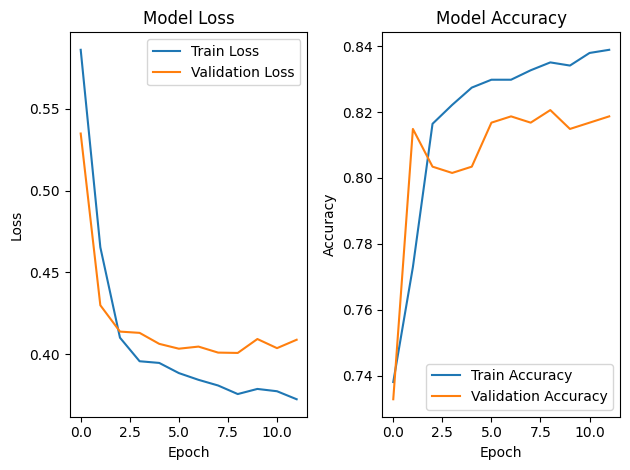

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
print(test_data)

            Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall  Evaporation  \
Date                                                                    
2020-01-04     12.7     17.0      9.0     19.7       0.0          3.2   
2020-02-04     11.9     18.6      8.0     18.8       0.0          4.0   
2020-03-04     14.4     20.6     11.2     20.8       2.8          5.6   
2020-04-04     13.7     18.3     12.5     19.5      20.4          4.0   
2020-05-04     15.2     18.7     11.5     21.7       0.0          2.8   
...             ...      ...      ...      ...       ...          ...   
2022-11-01     10.5     17.9      8.6     19.6       0.0          2.0   
2022-12-01     11.0     18.7      9.3     19.2       0.0          2.0   
2022-01-13     10.2     17.3      9.4     17.7       0.0          2.4   
2022-01-14     12.4     19.0     10.1     19.3       0.0          1.4   
2022-01-15      9.4     18.8      7.6     19.3       0.0          3.4   

            Sunshine  WindGustDir  WindGustSpeed  

converting the target to categorical

In [ ]:
# Assuming predictions is a numpy array containing numeric predictions
threshold = 0.5  # Example threshold, adjust as needed

# Convert numeric predictions to categorical labels
categorical_predictions = np.where(predictions > threshold, 'Yes', 'No')

# Now categorical_predictions contains 'Yes' or 'No' labels based on the threshold


In [ ]:
print(categorical_predictions)

[['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['

creating csv file in the submission file format

In [ ]:
import pandas as pd

# Assuming predictions and test_data contain predictions and corresponding IDs
# Convert numeric predictions to categorical labels using a threshold
threshold = 0.5  # Example threshold, adjust as needed
categorical_predictions = np.where(predictions > threshold, 'Yes', 'No')

# Create a DataFrame with ID and categorical predictions
predictions_df = pd.DataFrame({'ID': test_data['ID'].values, 'Predictions': categorical_predictions.flatten()})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


In [ ]:
print(predictions_df)

      ID Predictions
0      1          No
1      2          No
2      3          No
3      4          No
4      5          No
..   ...         ...
650  651          No
651  652          No
652  653          No
653  654          No
654  655          No

[655 rows x 2 columns]
